In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
police_shootings=pd.read_csv("fatal-police-shootings-data.csv")
cities=pd.read_csv("cities.csv")

In [4]:
police_shootings.head()
police_shootings.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
police_shootings.replace(to_replace = ['B'], value = ['Black'], inplace = True)
police_shootings.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
police_shootings.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
police_shootings.replace(to_replace = ['O'], value = ['Other'], inplace = True)
police_shootings.replace(to_replace = ['W'], value = ['White '], inplace = True)

In [5]:
missing_percentage=police_shootings.isna().sum()*100/police_shootings.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

In [6]:
police_shootings.dropna(inplace=True)

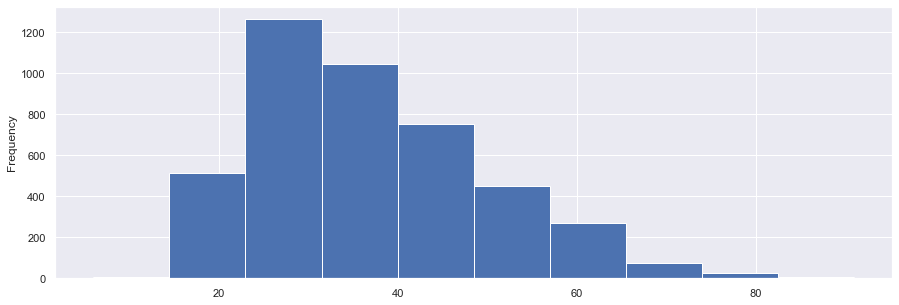

In [7]:
sns.set(rc={'figure.figsize':(15,5)})
police_shootings["age"].plot.hist()

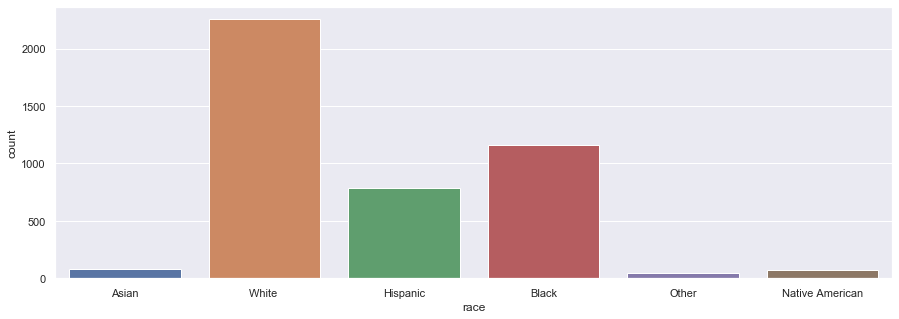

In [8]:
sns.countplot(x = "race", data = police_shootings)

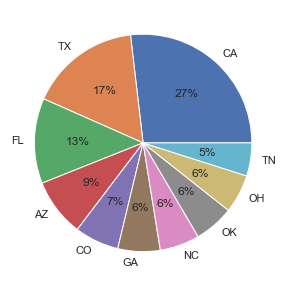

In [9]:
shootout_by_states = police_shootings['state'].value_counts()[:10]
shootout_by_states = pd.DataFrame(shootout_by_states)
shootout_by_states=shootout_by_states.reset_index()
plt.pie(shootout_by_states["state"],labels=shootout_by_states["index"],autopct="%1.0f%%")
plt.show()

In [10]:
shootout_by_states

,index,state
0,CA,623
1,TX,383
2,FL,294
3,AZ,200
4,CO,153
5,GA,146
6,NC,137
7,OK,137
8,OH,133
9,TN,114


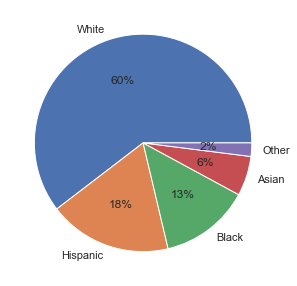

In [11]:
#Informacion obtenida de https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States
#USA population (2019) = 328.2 million
dict_ = {'White': 60.4, 'Hispanic': 18.3, 'Black': 13.4,'Asian':5.9,'Other':2.0}
census = pd.DataFrame(dict_.items(), columns=['Race', 'Population %'])
census['Population (millions)'] = census['Population %']*3.282
census
plt.pie(census["Population %"],labels=census["Race"],autopct="%1.0f%%")
plt.show()

In [12]:
pscities = pd.merge(police_shootings, cities, on=["city","state"])
pscities.to_csv("latlongpolice.csv")

In [13]:
pscities.query("state=='DC'")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Unnamed: 0,address,geom,latitude,longitude
910,282,Bobby Gross,2015-03-12,shot,unarmed,35.0,M,Black,Washington,DC,True,other,Not fleeing,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
911,955,Marquesha McMillan,2015-10-26,shot,gun,21.0,F,Black,Washington,DC,False,attack,Not fleeing,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
912,975,James Covington,2015-11-02,shot,gun,62.0,M,Black,Washington,DC,False,attack,Car,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
913,1022,Darick Napper,2015-11-19,shot,knife,34.0,M,Black,Washington,DC,False,other,Not fleeing,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
914,1219,Peter John,2016-02-01,shot,toy weapon,36.0,M,Black,Washington,DC,False,attack,Foot,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
915,1666,Sherman Evans,2016-06-27,shot,toy weapon,63.0,M,Black,Washington,DC,True,attack,Not fleeing,True,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
916,1683,Sidney Washington,2016-07-04,shot,gun,21.0,M,Black,Washington,DC,False,attack,Not fleeing,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
917,1875,Terrence Sterling,2016-09-11,shot,motorcycle,31.0,M,Black,Washington,DC,False,attack,Other,False,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
918,2159,Gerald Hall,2016-12-25,shot,knife,29.0,M,Black,Washington,DC,False,other,Not fleeing,True,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571
919,2377,Timothy Lionel Williams,2017-02-23,shot,gun,47.0,M,Black,Washington,DC,False,attack,Foot,True,165,"Washington,DC,USA","(38.8949855, -77.0365708)",38.894985,-77.036571


In [14]:
cities

,Unnamed: 0,city,state,address,geom,latitude,longitude
0,0,Shelton,WA,"Shelton,WA,USA","(47.2150945, -123.1007066)",47.215094,-123.100707
1,1,Aloha,OR,"Aloha,OR,USA","(45.4942838, -122.8670451)",45.494284,-122.867045
2,2,Wichita,KS,"Wichita,KS,USA","(37.6922361, -97.3375448)",37.692236,-97.337545
3,3,San Francisco,CA,"San Francisco,CA,USA","(37.7790262, -122.4199061)",37.779026,-122.419906
4,4,Evans,CO,"Evans,CO,USA","(40.3763701, -104.6921874)",40.376370,-104.692187
...,...,...,...,...,...,...,...
2758,2783,DeKalb County,TN,"DeKalb County,TN,USA","(35.9804643, -85.83965)",35.980464,-85.839650
2759,2784,Paso Robles,CA,"Paso Robles,CA,USA","(35.6267654, -120.6912456)",35.626765,-120.691246
2760,2785,Crown Point,IN,"Crown Point,IN,USA","(41.4169806, -87.3653136)",41.416981,-87.365314
2761,2786,Lawrence,KS,"Lawrence,KS,USA","(38.9719384, -95.2359496)",38.971938,-95.235950


In [15]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

In [16]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [17]:
pscities['month'] = pd.to_datetime(pscities['date']).dt.month
pscities['year'] = pd.to_datetime(pscities['date']).dt.year
pscities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,Unnamed: 0,address,geom,latitude,longitude,month,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,attack,Not fleeing,False,0,"Shelton,WA,USA","(47.2150945, -123.1007066)",47.215094,-123.100707,1,2015
1,5685,Kathryn R. Hale,2020-03-24,shot,vehicle,32.0,F,White,Shelton,WA,...,attack,Car,False,0,"Shelton,WA,USA","(47.2150945, -123.1007066)",47.215094,-123.100707,3,2020
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,attack,Not fleeing,False,1,"Aloha,OR,USA","(45.4942838, -122.8670451)",45.494284,-122.867045,1,2015
3,890,Phyllis Ilene Jepsen,2015-10-02,shot,knife,55.0,F,White,Aloha,OR,...,other,Not fleeing,False,1,"Aloha,OR,USA","(45.4942838, -122.8670451)",45.494284,-122.867045,10,2015
4,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,other,Not fleeing,False,2,"Wichita,KS,USA","(37.6922361, -97.3375448)",37.692236,-97.337545,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,M,White,Industry,CA,...,other,Not fleeing,False,2781,"Industry,CA,USA","(34.0197335, -117.9586754)",34.019734,-117.958675,6,2020
4374,5913,Gregorio Cruz Vanloo,2020-06-11,shot,gun,28.0,M,White,DeKalb County,TN,...,other,Other,False,2783,"DeKalb County,TN,USA","(35.9804643, -85.83965)",35.980464,-85.839650,6,2020
4375,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,White,Paso Robles,CA,...,attack,Foot,False,2784,"Paso Robles,CA,USA","(35.6267654, -120.6912456)",35.626765,-120.691246,6,2020
4376,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,...,attack,Car,False,2785,"Crown Point,IN,USA","(41.4169806, -87.3653136)",41.416981,-87.365314,6,2020


In [18]:
from sqlalchemy import create_engine

In [19]:
pscities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,Unnamed: 0,address,geom,latitude,longitude,month,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,attack,Not fleeing,False,0,"Shelton,WA,USA","(47.2150945, -123.1007066)",47.215094,-123.100707,1,2015
1,5685,Kathryn R. Hale,2020-03-24,shot,vehicle,32.0,F,White,Shelton,WA,...,attack,Car,False,0,"Shelton,WA,USA","(47.2150945, -123.1007066)",47.215094,-123.100707,3,2020
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,attack,Not fleeing,False,1,"Aloha,OR,USA","(45.4942838, -122.8670451)",45.494284,-122.867045,1,2015
3,890,Phyllis Ilene Jepsen,2015-10-02,shot,knife,55.0,F,White,Aloha,OR,...,other,Not fleeing,False,1,"Aloha,OR,USA","(45.4942838, -122.8670451)",45.494284,-122.867045,10,2015
4,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,other,Not fleeing,False,2,"Wichita,KS,USA","(37.6922361, -97.3375448)",37.692236,-97.337545,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,M,White,Industry,CA,...,other,Not fleeing,False,2781,"Industry,CA,USA","(34.0197335, -117.9586754)",34.019734,-117.958675,6,2020
4374,5913,Gregorio Cruz Vanloo,2020-06-11,shot,gun,28.0,M,White,DeKalb County,TN,...,other,Other,False,2783,"DeKalb County,TN,USA","(35.9804643, -85.83965)",35.980464,-85.839650,6,2020
4375,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,White,Paso Robles,CA,...,attack,Foot,False,2784,"Paso Robles,CA,USA","(35.6267654, -120.6912456)",35.626765,-120.691246,6,2020
4376,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,...,attack,Car,False,2785,"Crown Point,IN,USA","(41.4169806, -87.3653136)",41.416981,-87.365314,6,2020


In [20]:
datos = pd.DataFrame({
 "tipo":["super","tarea"],
    "desc":["leche","estudiar"]
 })
 #Create engine
engine= create_engine("postgresql+psycopg2://postgres:jaramillo35@/Prueba")
#Send appending without index
pscities.to_sql("alldata", if_exists="append",index=False, con= engine)
engine.dispose()

In [21]:
countallyears=pscities.groupby("state")["id"].count()
countallyears = countallyears.reset_index().rename(columns={"id":"count"})
engine= create_engine("postgresql+psycopg2://postgres:jaramillo35@/Prueba")
 #Send appending without index
countallyears.to_sql("allyears", if_exists="append",index=False, con= engine)
engine.dispose()

In [22]:
state_count_by_year = pscities.groupby(["state","year"])
state_count_by_year = state_count_by_year["id"].count()
state_count_by_year = state_count_by_year.reset_index().rename(columns={"id":"count"})
#b=state_count.query("state!='DC'").head(51).reset_index()
#del b["index"]
engine= create_engine("postgresql+psycopg2://postgres:jaramillo35@/todo_list")
 #Send appending without index
state_count_by_year.to_sql("years", if_exists="append",index=False, con= engine)
engine.dispose()

In [23]:
state_count.to_json("statecount.json")

NameError: name 'state_count' is not defined

In [ ]:
query = "select * from years where year=2015"
engine=create_engine("postgresql+psycopg2://postgres:jaramillo35@/Prueba")
datos = pd.read_sql(query, engine)
#datos=datos[["year","count"]]
datos=datos["count"]
#datos.set_index("year").to_json(orient='records')
datos

In [ ]:
pd.read_json("states.json")

In [ ]:
s

In [ ]:
countmap = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_count,
    columns=['state', 'count'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Incidents '
).add_to(countmap)

folium.LayerControl().add_to(countmap)

countmap

In [ ]:
formap = pscities[["name","city","longitude","latitude"]]

areamap = folium.Map(location=[32, -100], tiles='openstreetmap', zoom_start=3)

mc = MarkerCluster()

for i, row in formap.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(folium.Marker([row['latitude'], row['longitude']], popup=[row['city'],row["name"]]))

areamap.add_child(mc)
areamap

In [24]:
a=pd.DataFrame(pd.read_json("states.json"))
#data["Indexes"]= data["Name"].str.find(sub) 
a

ValueError: Unexpected character found when decoding array value (2)

In [25]:
del b["index"]

NameError: name 'b' is not defined

In [26]:
t=pd.read_csv("Names.csv")
t=pd.merge(t,state_count).sort_values("name")
t=t.reset_index()
del t["index"]
mer=t[["state","name","count"]]

to=t[["Unnamed: 2","count"]]
to=to["count"]

NameError: name 'state_count' is not defined

In [27]:
to


NameError: name 'to' is not defined

In [28]:
t

,state,name,Unnamed: 2
0,AK,Alaska,NaN
1,AL,Alabama,NaN
2,AR,Arkansas,NaN
3,AZ,Arizona,NaN
4,CA,California,NaN
5,CO,Colorado,NaN
6,CT,Connecticut,NaN
7,DC,District of Columbia,NaN
8,DE,Delaware,NaN
9,FL,Florida,NaN


In [29]:
t.to_json("co.json")